In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'

# APEX Gun

In [3]:
from astra import Astra, template_dir
from astra import recommended_spacecharge_mesh
from distgen import Generator

import matplotlib.pyplot as plt
import os

In [4]:
# Input template file 
ASTRA_IN = os.path.join(template_dir, 'apex_gun/astra.in')
DISTGEN_IN = os.path.join(template_dir, 'apex_gun/distgen.yaml')

In [5]:
recommended_spacecharge_mesh(10000)

{'nrad': 20, 'nlong_in': 43}

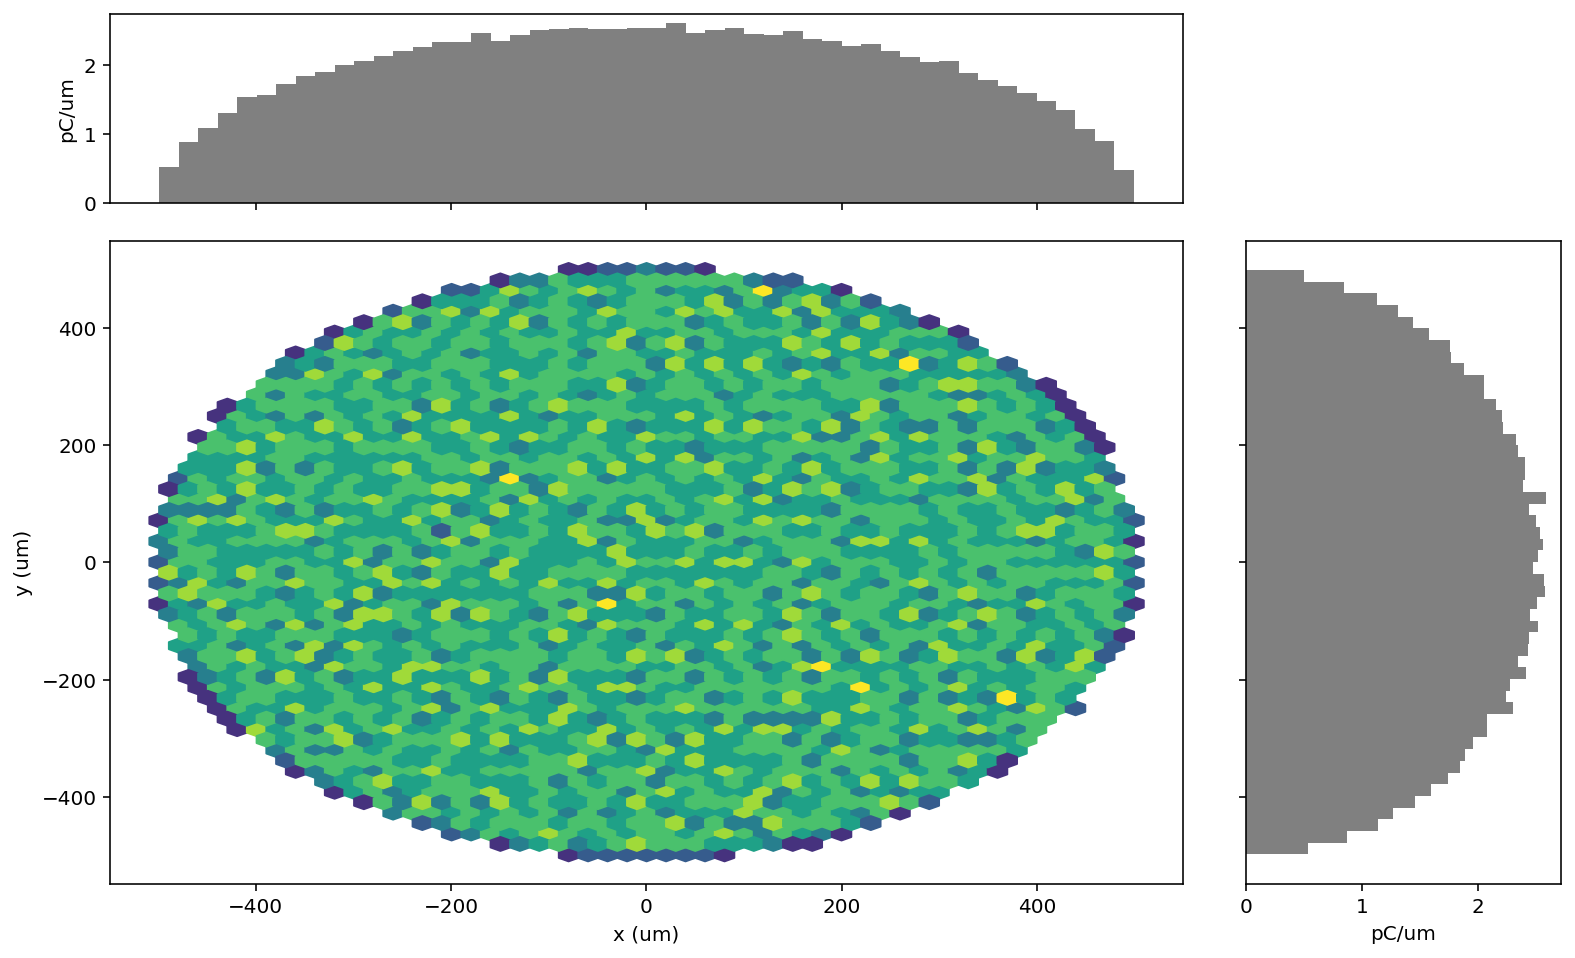

In [6]:
G = Generator(DISTGEN_IN)
G['n_particle'] = 10000

G.run()
P0 = G.particles
#factor = 2
#P0.x *= factor  
#P0.y *= 1/factor 
P0.plot('x', 'y')

In [7]:
# Make an Astra object
A = Astra(input_file=ASTRA_IN, initial_particles=P0, verbose=True)
sc_settings = recommended_spacecharge_mesh(P0['n_particle'])
A.input['charge'].update()

A.input['output']['zstop'] = 0.15

A.input['charge']['lspch'] = True

A.input['charge']['lspch3d'] = False

In [8]:
%%time
# Run
A.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpqwl3k1g_/astra.particles
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                            Version 3.0              
                        DESY,  Hamburg 2011          
                        Tue Apr 21 20:31:02 

     Parameter file is:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/t
     APEX Gun                                                                        

 Initialize element settings:
 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/187MHz_HighDef_March
     field smoothing is applied
     Cavity Frequency               f =   0.1870     GHz
     maximum gradient                      20.00     MV/m
     at                                    0.000     m
  

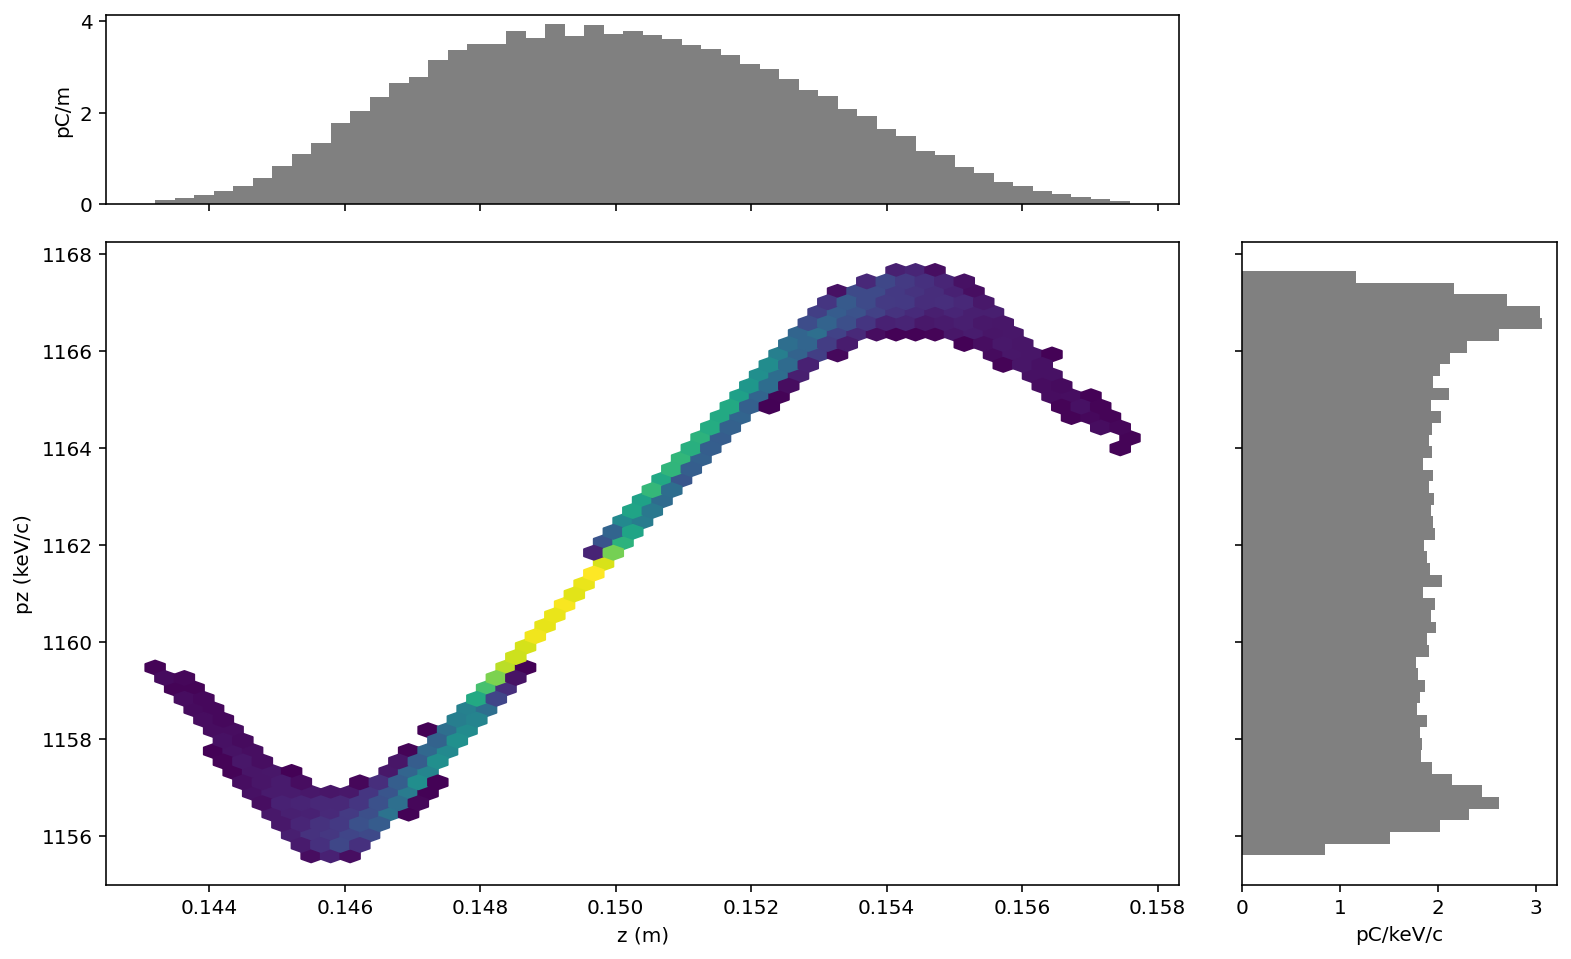

In [9]:
P1 = A.particles[-1]
P1.plot('z', 'pz')

In [10]:
A.stat('sigma_z')

array([0.00018525, 0.0003282 , 0.00043852, 0.00052457, 0.00060161,
       0.0006668 , 0.00072781, 0.00078495, 0.00083196, 0.00088037,
       0.0009243 , 0.00096499, 0.0010013 , 0.0010384 , 0.001075  ,
       0.0011078 , 0.0011403 , 0.0011683 , 0.0012003 , 0.0012286 ,
       0.0012559 , 0.0012823 , 0.0013057 , 0.0013323 , 0.001356  ,
       0.0013792 , 0.0014015 , 0.0014233 , 0.0014443 , 0.0014648 ,
       0.0014847 , 0.0015029 , 0.001523  , 0.0015414 , 0.0015576 ,
       0.0015759 , 0.0015938 , 0.0016104 , 0.0016266 , 0.0016425 ,
       0.0016579 , 0.0016729 , 0.0016878 , 0.0017023 , 0.0017164 ,
       0.0017303 , 0.0017438 , 0.001757  , 0.00177   , 0.001782  ,
       0.001794  , 0.0018074 , 0.0018193 , 0.0018311 , 0.0018415 ,
       0.0018533 , 0.0018649 , 0.0018757 , 0.0018864 , 0.0018968 ,
       0.0019071 , 0.0019172 , 0.001927  , 0.0019368 , 0.0019463 ,
       0.0019557 , 0.0019649 , 0.0019739 , 0.0019828 , 0.0019909 ,
       0.0020002 , 0.0020087 , 0.002017  , 0.0020252 , 0.00203

# 3D Space Charge method

This does not properly take the image charge force at the cathode.


In [11]:
A2 = A.copy()
A2.input['charge']['lspch'] = True
A2.input['charge']['lspch3d'] = True
A2.input['charge']['l2d_3d'] = False
A2.input['charge']['nxf'] = 32
A2.input['charge']['nyf'] = 32
A2.input['charge']['nzf'] = 32
A2.input['charge']['nx0'] = 4
A2.input['charge']['ny0'] = 4
A2.input['charge']['nz0'] = 4
A2.configure()
A2.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpe0yj0r8v/astra.particles
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                            Version 3.0              
                        DESY,  Hamburg 2011          
                        Tue Apr 21 20:33:20 

     Parameter file is:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/t
     APEX Gun                                                                        

 Initialize element settings:
 --------------------------------------------------------------------------
 Cavity:

     Reading cavity field data from:      /Users/chrisonian/Code/GitHub/lume-astra/templates/apex_gun/187MHz_HighDef_March
     field smoothing is applied
     Cavity Frequency               f =   0.1870     GHz
     maximum gradient                      20.00     MV/m
     at                                    0.000     m
  

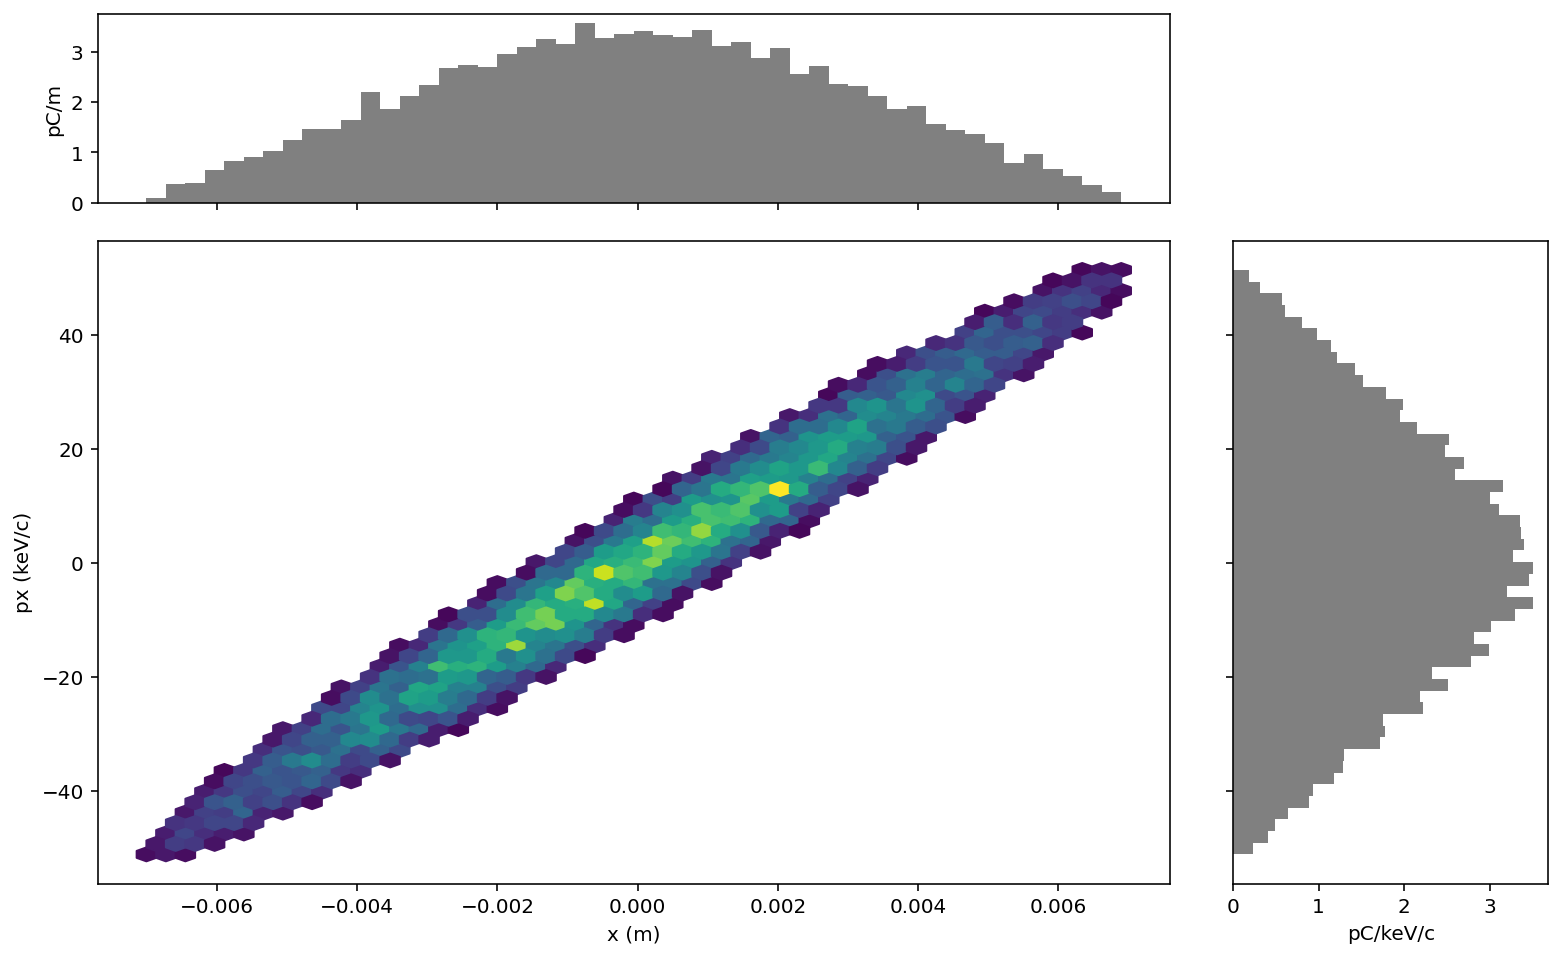

In [12]:
P2 = A2.particles[-1]
P2.plot('x', 'px')

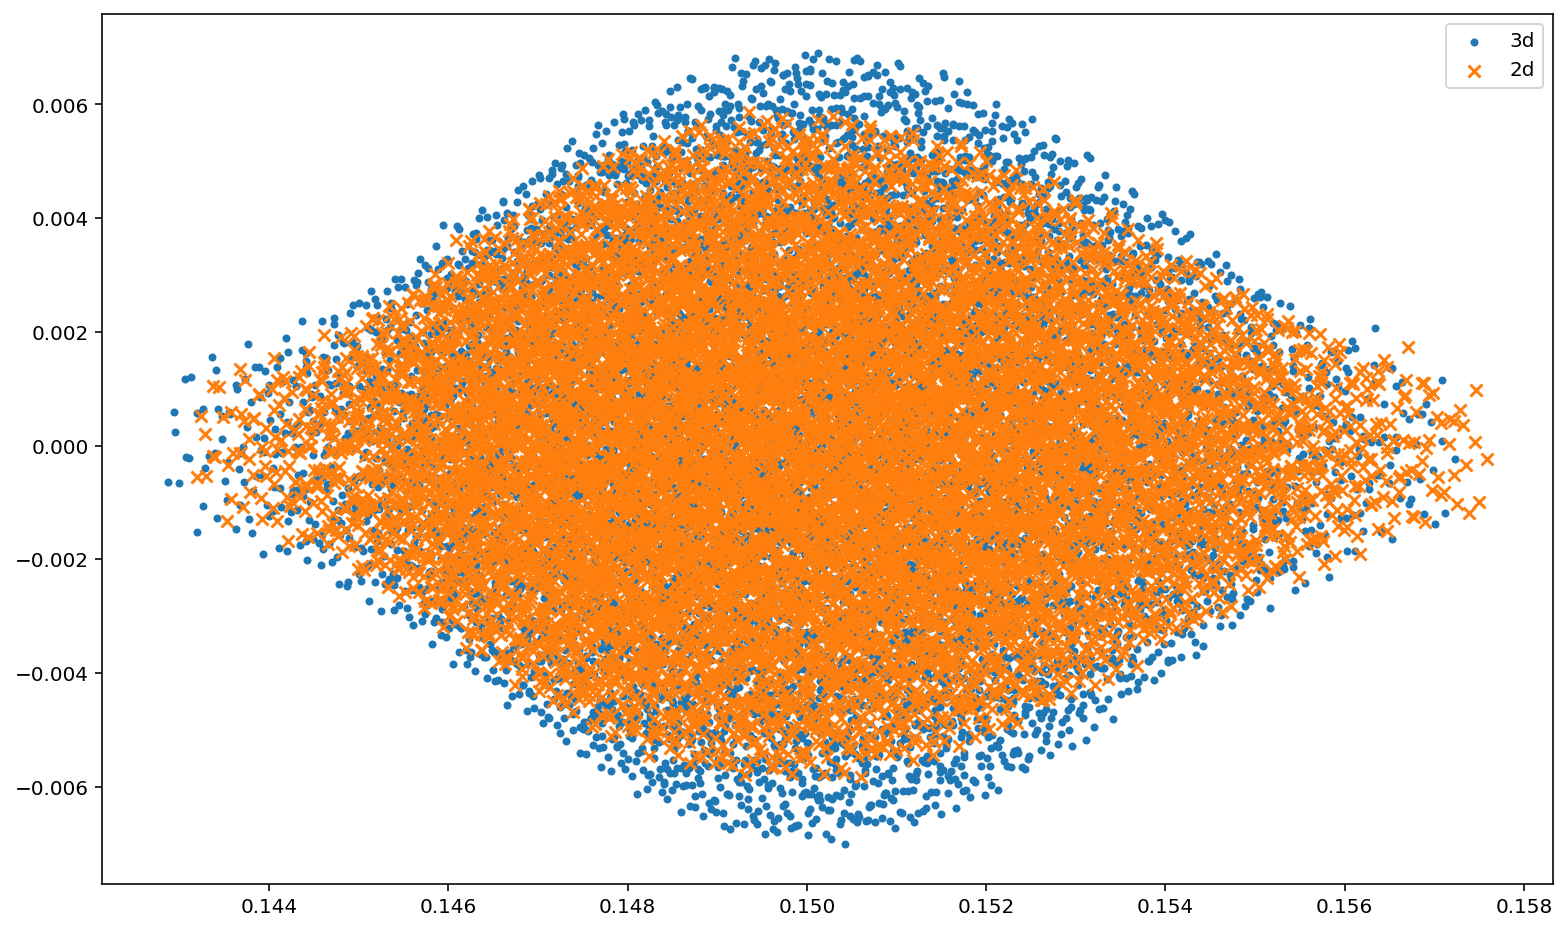

In [13]:
k1 = 'z'
k2 = 'x'
plt.scatter(P2[k1], P2[k2], label='3d', marker='.')
plt.scatter(P1[k1], P1[k2], label='2d', marker='x')

plt.legend()

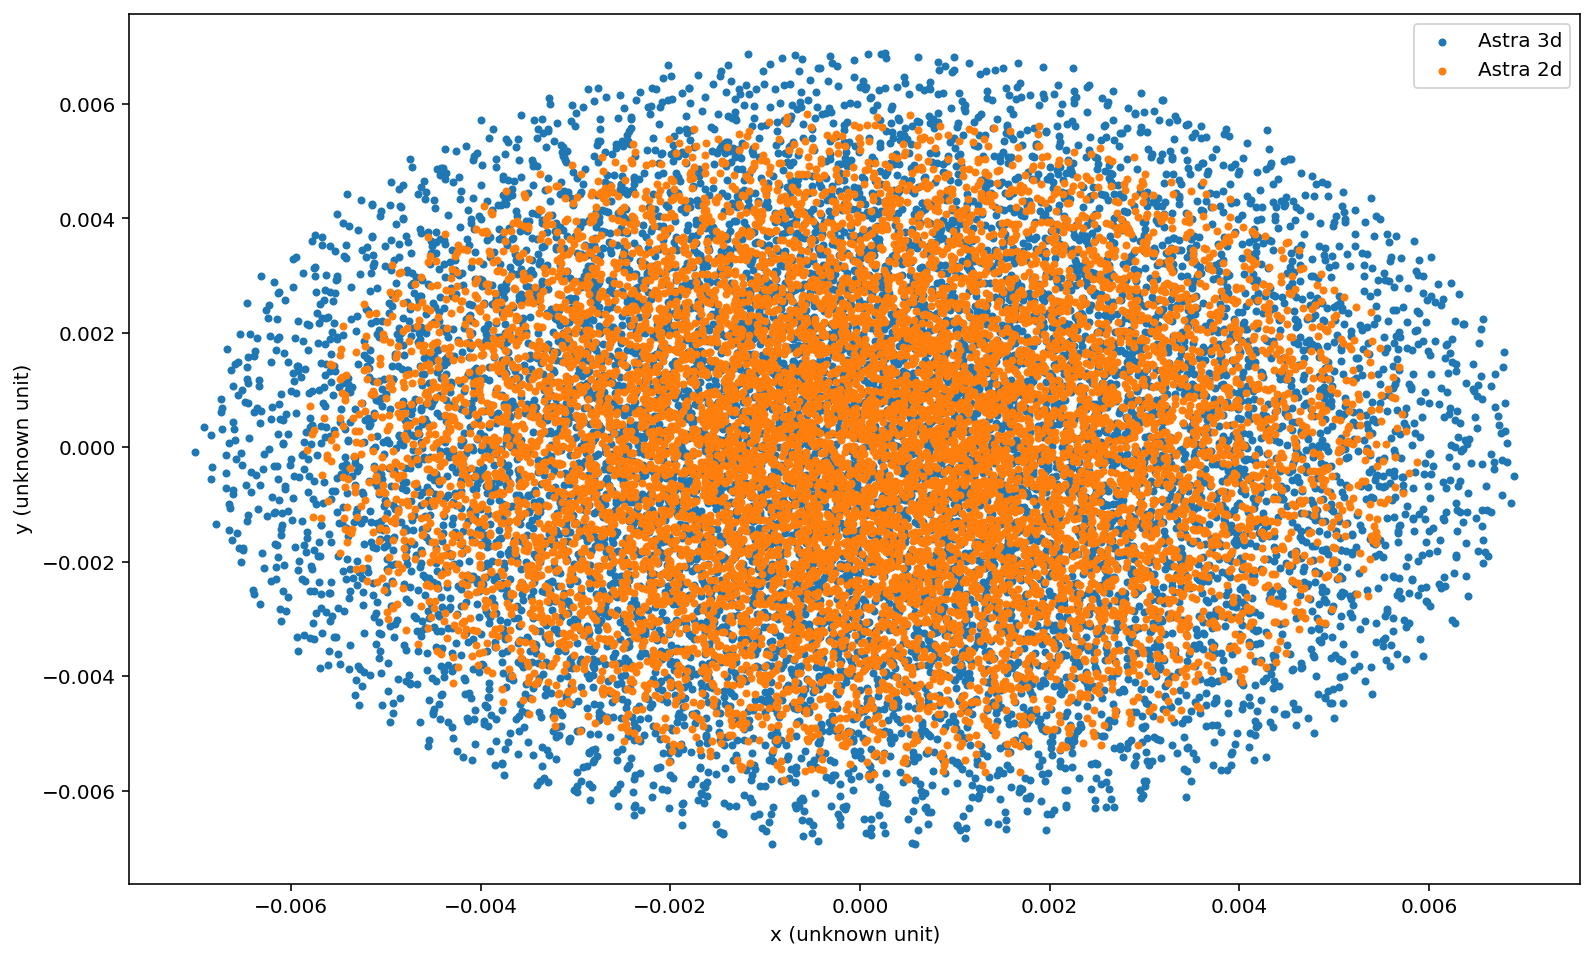

In [14]:
k1 = 'x'
k2 = 'y'

units1 = str(A.units(k1))
units2 = str(A.units(k2))
plt.xlabel(k1+f' ({units1})')
plt.ylabel(k2+f' ({units2})')
plt.scatter(P2[k1], P2[k2], label='Astra 3d', marker='.')
plt.scatter(P1[k1], P1[k2], label='Astra 2d', marker='.')
#plt.scatter(P3[k1], P3[k2], label='Impact-T 3d', marker='.')
#plt.scatter(P4[k1], P4[k2], label='GPT 3D', marker='.')
plt.legend()